   battery_power  blue  clock_speed  dual_sim  fc  four_g  price_range
0           3232     0     2.177789         1  18       1            3
1           3107     0     2.709449         0   1       1            2
2           2153     1     1.482417         1  19       1            2
3           3764     1     2.812100         0  17       0            1
4           1335     1     1.129067         1   8       0            3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   price_range    1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB
None
       battery_po

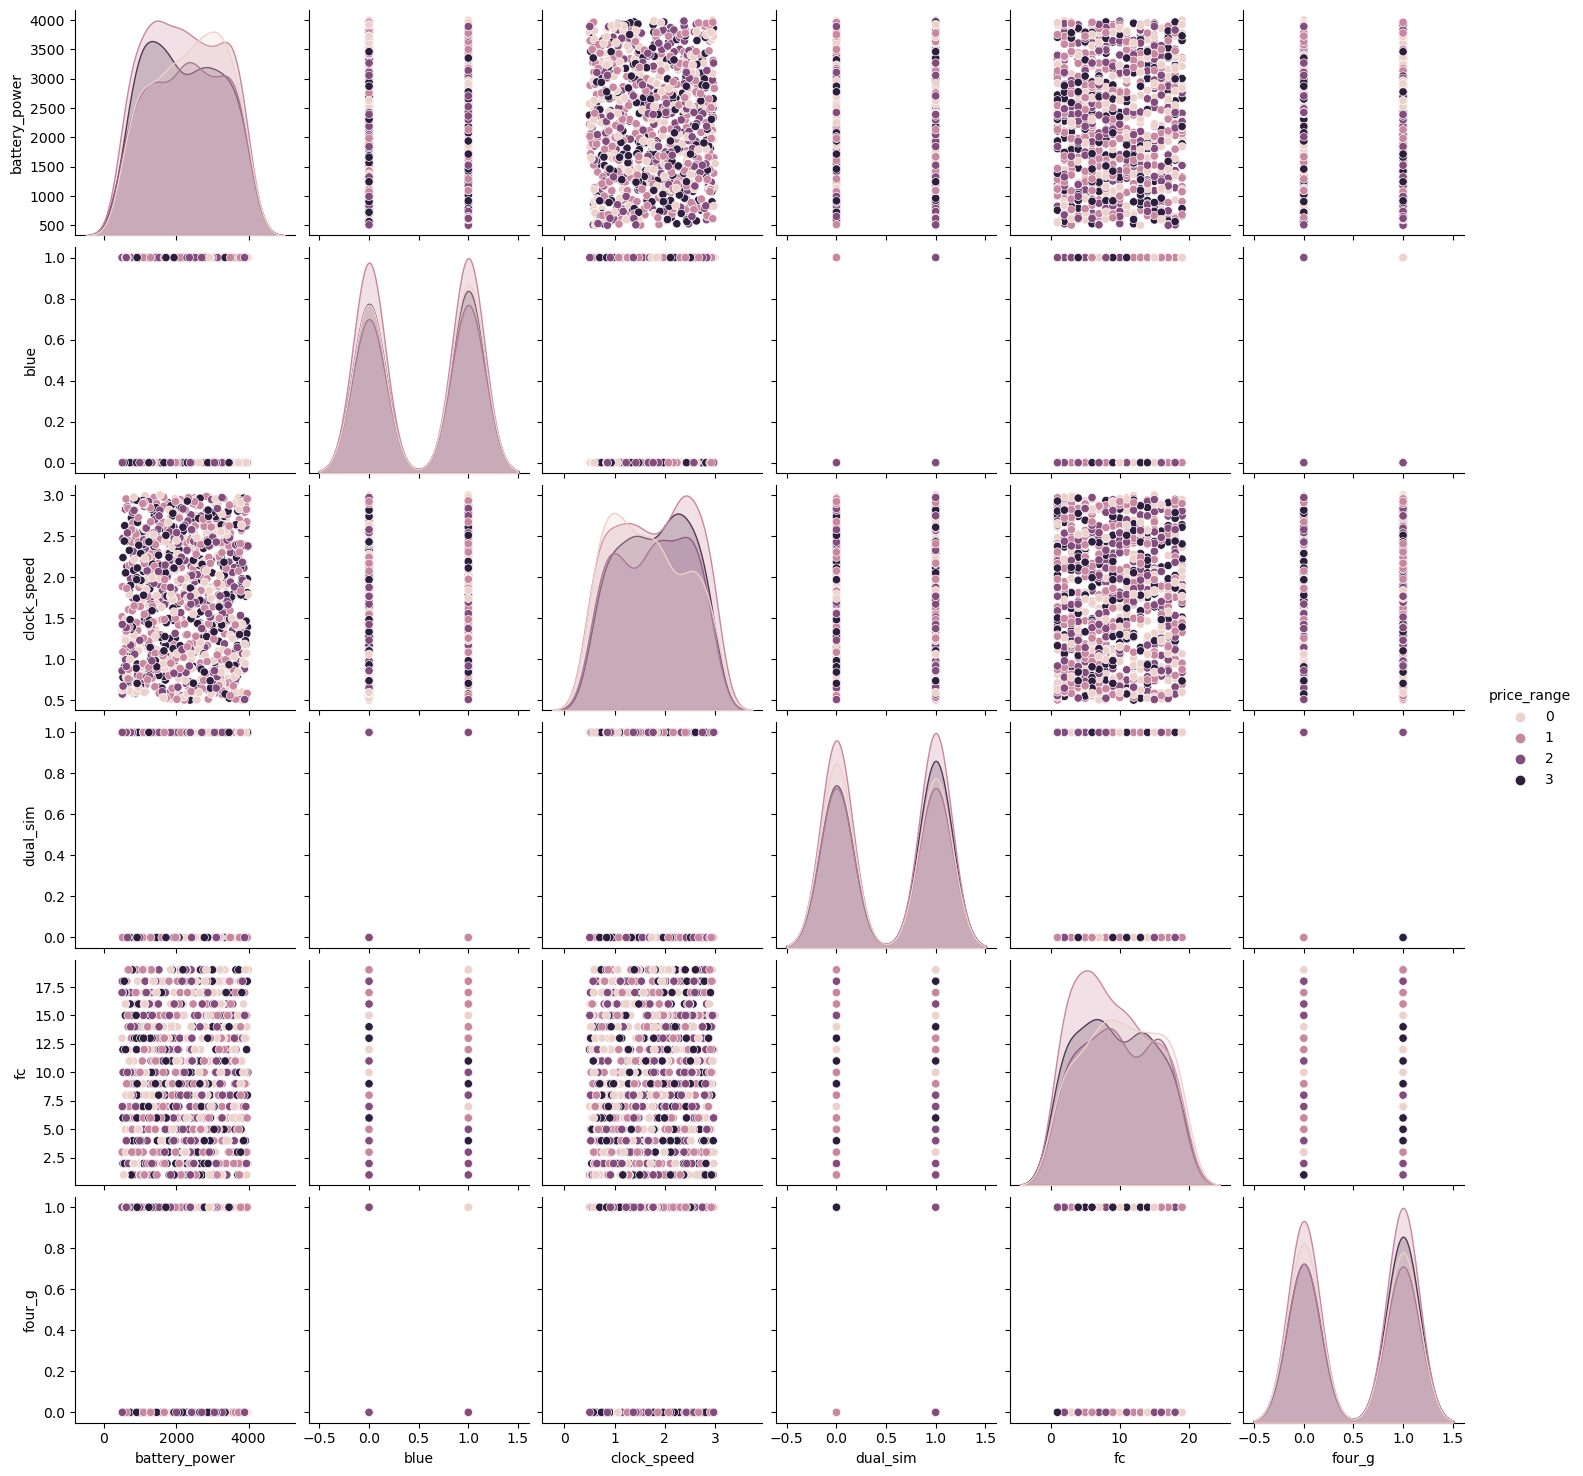

Random Forest Results:
Accuracy: 0.28
F1 Score: 0.28
Precision: 0.28

SVM Results:
Accuracy: 0.32
F1 Score: 0.16
Precision: 0.78

Decision Tree Results:
Accuracy: 0.26
F1 Score: 0.26
Precision: 0.27

Logistic Regression Results:
Accuracy: 0.29
F1 Score: 0.21
Precision: 0.41

K-Nearest Neighbors Results:
Accuracy: 0.23
F1 Score: 0.23
Precision: 0.24

Best Model (Random Forest) Results:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy: 0.27
F1 Score: 0.27
Precision: 0.27


In [5]:
""""
NAME : ELIJAH OKOH
TRAINING ID : 36090
SUBJECT : PYTHON PROGRAMMING INDIVIDUAL PROJECT 2 (PHONE PREDICTION MODEL)
"""

#######################
#    SOLUTION
#######################

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Data Preparation

np.random.seed(0)

# Define the number of samples
n_samples = 1000  # You can adjust this as needed

# Generate synthetic data for each feature
battery_power = np.random.randint(500, 4000, size=n_samples)
blue = np.random.randint(0, 2, size=n_samples)
clock_speed = np.random.uniform(0.5, 3.0, size=n_samples)
dual_sim = np.random.randint(0, 2, size=n_samples)
fc = np.random.randint(1, 20, size=n_samples)
four_g = np.random.randint(0, 2, size=n_samples)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'battery_power': battery_power,
    'blue': blue,
    'clock_speed': clock_speed,
    'dual_sim': dual_sim,
    'fc': fc,
    'four_g': four_g
})

# Generate the target variable (price_range)
# You can adjust the distribution of price ranges as needed
price_range = np.random.choice([0, 1, 2, 3], size=n_samples)

data['price_range'] = price_range

# Save the dataset to a CSV file
data.to_csv('phone_dataset.csv', index=False)

# Display the first few rows of the dataset
print(data.head())


# Inspect the dataset structure
print(data.info())

# Handle missing values if any
data.dropna(inplace=True)  # Assuming there are missing values

# Encode categorical features
# No categorical features to encode in this case

# Step 2: Data Exploration
# Summary statistics and distribution of features
print(data.describe())

# Visualize relationships between features and target variable
sns.pairplot(data=data, hue='price_range')
plt.show()

# Step 3: Model Selection and Training
# Split the dataset into features (X) and target variable (y)
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Evaluate the performance of each model using various metrics
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision}

# Print the evaluation results
for model_name, metrics in results.items():
    print(f'{model_name} Results:')
    print(f'Accuracy: {metrics["Accuracy"]:.2f}')
    print(f'F1 Score: {metrics["F1 Score"]:.2f}')
    print(f'Precision: {metrics["Precision"]:.2f}')
    print()


# Step 5: Model Fine-Tuning
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Re-evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Best Model (Random Forest) Results:')
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
